# Very brief introduction to ODEs for genetic and metabolic modelling
March 2020, Nadanai Laohakunakorn (nadanai.laohakunakorn@ed.ac.uk)



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

A differential equation relates the value of a function to its rate of change:

\begin{equation}
\frac{dp(t)}{dt} = -k p(t)
\end{equation}

Here, $p(t)$ is a time-dependent variable, and $k$ is a parameter. Make sure you understand the difference between a variable and a parameter. This equation can also be expressed using dot-notation as $\dot{p}=-kp$.

This equation says that the rate of change of $p(t)$, as a function of $t$, is equal to 
* the value of p(t)
* scaled by the parameter k
* with a minus sign

So, 
1. when $p$ is large, the gradient is steep and downwards
2. when $p$ is small, the gradient is shallow and close to 0.

Let's solve the equation to see if this intuition is correct.

## 1. Solving the equation mathematically

To mathematically solve this equation, we **integrate**:

\begin{equation}
\frac{dp(t)}{dt} = -k p(t)
\end{equation}

\begin{equation}
dp(t) = -k p(t) dt
\end{equation}

\begin{equation}
\int dp = \int -k p(t) dt
\end{equation}

\begin{equation}
\int \frac{dp}{p(t)} = \int -k dt
\end{equation}

### 1.1 Indefinite integration: a family of functions

We can integrate *indefinitely*, which means solving the equation generally, which results in a family of functions (as multiple functions can obey the same ODE):

\begin{equation}
\int \frac{dp}{p(t)} = \int -k dt
\end{equation}
which, using standard integration results, becomes:
\begin{equation}
\ln p(t) = -kt + C
\end{equation}
where $C$ is a *constant of integration*. This can be expressed as:
\begin{equation}
p(t) = \exp(-kt + C)
\end{equation}
\begin{equation}
p(t) = \exp(-kt)\exp(C)
\end{equation}
\begin{equation}
p(t) = A\exp(-kt),
\end{equation}
where we have redefined $A=\exp(C)$ as a new constant of integration. What does this look like?

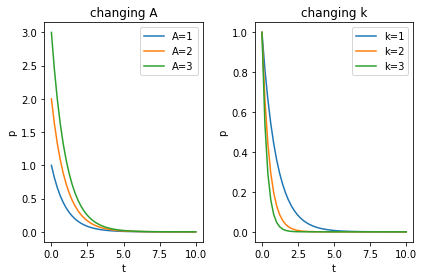

In [2]:
# Plot 

t = np.linspace(0,10,50)

def p(t,k,A):
    return A*np.exp(-k*t)

f, (ax1, ax2) = plt.subplots(1, 2)
for A in [1,2,3]:
    k = 1
    ax1.plot(t, p(t,k,A), label='A='+str(A))
ax1.set_title('changing A'); ax1.legend(); ax1.set_xlabel('t'); ax1.set_ylabel('p')

for k in [1,2,3]:
    A = 1
    ax2.plot(t,p(t,k,A), label='k='+str(k))
ax2.set_title('changing k') ; ax2.legend(); ax2.set_xlabel('t'); ax2.set_ylabel('p')
f.tight_layout(); plt.show()

So our intuition was correct. Additionally you can see how the constants $A$ and $k$ affect the solution: $A$ is the y-intercept, which in this case is also known as the *initial condition*, as it represents the value of $p$ at time $t=0$. $k$ is the decay constant. In general, this family of solutions represents an exponential decay.

### 1.2 Definite integration: a specific case

We can also carry out *definite integration*, which means solving the equation for a specific case. Here you need **boundary conditions**, which are values of the function at specific times: this allows you to select your trajectory out of the large family of possible trajectories illustrated above. 

For instance, say you knew that $p(t=0)$ equals some constant $p_0$:

\begin{equation}
\int_{p=p_0}^{p(t)} \frac{dp}{p(t)} = \int_{0}^{t=\infty} -k dt
\end{equation}
As before we end up with the standard integration result, but this time without an integration constant:
\begin{equation}
\left[\ln p(t)\right]_{p_0}^{p} = \left[-kt\right] _{0}^{t}
\end{equation}
which becomes, after evaluating the brackets at each of the time points,

\begin{equation}
\ln p(t) - \ln p_0 = -kt - 0
\end{equation}

\begin{equation}
p(t) = \exp(-kt + \ln p_0)
\end{equation}
\begin{equation}
p(t) = p_0\exp(-kt),
\end{equation}
where we now get a specific trajectory (equivalent to above, but with $A=p_0$, our boundary condition).

## 2. Solving the equation numerically

In the computer we would like to solve this equation numerically. To do this we use the definition of the derivative, that $dt\approx\Delta t$, and $dp(t)\approx(p(t+\Delta t)-p(t))$:
\begin{equation}
\frac{dp(t)}{dt} = -k p(t)
\end{equation}
becomes
\begin{equation}
\frac{p(t+\Delta t)-p(t)}{\Delta t} = -k p(t)
\end{equation}

So we can rearrange this to get

\begin{equation}
p(t+\Delta t) = (-k p(t))\Delta t+p(t)
\end{equation}

This equation gives $p(t+\Delta t)$, the value of $p$ at the next time increment, calculating it from $p$ at the previous time step. So by iterating over this equation, starting from an initial value of $p$, we can determine all future values of $p$. This way of solving is called the *Euler method* and forms the basis of all numerical ODE solvers. 

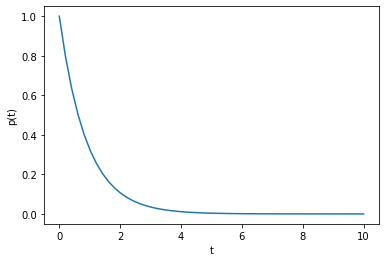

In [3]:
# Euler method with python

def euler(p0, t, k):
    
    dt = t[1]-t[0] # time increment
    N = len(t) # number of timepoints
    p = np.ones(N)*p0

    for j in range(N-1):
        p[j+1] = -k*p[j]*dt + p[j]
        
    return(p)

time = np.linspace(0,10,50)
p0 = 1.0
k = 1
p = euler(p0,time,k)
plt.plot(time,p); plt.xlabel('t'); plt.ylabel('p(t)'); plt.show()

In python we can use the more efficient `odeint` function from scipy. This function takes as an input
* initial values for all dependent variables (in this case, p)
* the axis of independent variables (in this case, t)
* parameters (in this case, k)
* and a function which returns the gradient i.e. the differential equation to be solved.

See below for how it's done:

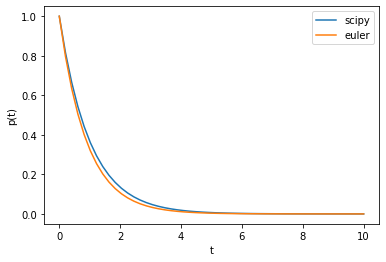

In [4]:
# Standard script to solve ODEs

time = np.linspace(0,10,50)
p0 = 1.0
params = np.array([1.0])

def grads(y, t, params):
    p = y[0]    
    k = params[0]
   
    derivs = [
        -k*p
    ]
    return(derivs)

sol = odeint(grads, p0, time, args=(params,))

plt.plot(time,sol, label='scipy'); plt.xlabel('t'); plt.ylabel('p(t)'); 
plt.plot(time,euler(p0,time,params), label='euler'); plt.legend(); plt.show() # compare to our Euler method

### Coupled ODEs: a simple enzyme model

Consider the following reactions:

\begin{equation}
E + A \underset{k_{-1}}{\stackrel{k_1}{\rightleftharpoons}} EA \overset{k_2}\rightarrow P + E
\end{equation}

The ODEs describing this complete set of reactions are coupled (NB $x$ is used as the symbol for the concentration of the enzyme-substrate complex). This means that the derivatives can depend on the instantaneous concentrations of the other metabolites, at each each time point:

\begin{align}
\dot{e} &= -k_1ea + k_{-1}x + k_2x\\
\dot{a} &= -k_1ea + k_{-1}x \\
\dot{x} &= k_1ea - k_{-1}x - k_2x \\
\dot{p} &= k_2x
\end{align}

Make sure you understand how to get these equations! To solve them is straightforward:

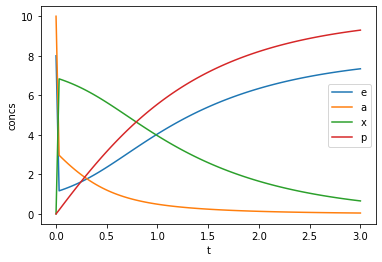

In [6]:
time = np.linspace(0,3,100)

# Define initial conditions
e0 = 8.0
a0 = 10.0
x0 = 0.0
p0 = 0.0

# Define parameters
kp1 = 100.0
kn1 = 50.0
kp2 = 1.0

# Set parameters and initial conditions in arrays
y0 = np.array([e0,a0,x0,p0])
params = np.array([kp1,kn1,kp2])

# Define gradient function - our ODEs
def grads(y, t, params):
    e = y[0]
    a = y[1]
    x = y[2]
    p = y[3]
    
    kp1 = params[0]
    kn1 = params[1]
    kp2 = params[2]
   
    derivs = [
        -kp1*e*a + kn1*x + kp2*x,
        -kp1*e*a + kn1*x,
        kp1*e*a - kn1*x - kp2*x,
        kp2*x
    ]
    return(derivs)

# Solve the ODEs
sol = odeint(grads, y0, time, args=(params,))

# Plot the results
plt.plot(time,sol[:,0], label='e');
plt.plot(time,sol[:,1], label='a');
plt.plot(time,sol[:,2], label='x');
plt.plot(time,sol[:,3], label='p');
plt.xlabel('t'); plt.ylabel('concs'); plt.legend(); plt.show()

## 3. Test your understanding

Solve the following ODEs which simulate commonly-observed synthetic gene circuit behaviour, and plot their outputs. Which terms are variables, and which are parameters? What values of parameters are required for oscillations and switching behaviour for circuits 5 and 6? More sophisticated models for cell-free transcription and translation are given in the TXTL survey at https://github.com/nadanai263/TXTL-survey.

1. Constitutive production
\begin{equation}
\dot{p} = \alpha 
\end{equation}

2. Constitutive production and decay
\begin{equation}
\dot{p} = \alpha - \beta p 
\end{equation}

3. A activates B
\begin{align}
\dot{A} &= \alpha - \beta A \\
\dot{B} &= \alpha\frac{1}{1+\left(\frac{K}{A}\right)^n} - \beta B
\end{align}

4. A represses B
\begin{align}
\dot{A} &= \alpha - \beta A \\
\dot{B} &= \alpha\frac{1}{1+\left(\frac{A}{K}\right)^n} - \beta B
\end{align}

5. Toggle switch
\begin{align}
\dot{A} &= \alpha\frac{1}{1+\left(\frac{B}{K}\right)^n} - \beta A \\
\dot{B} &= \alpha\frac{1}{1+\left(\frac{A}{K}\right)^n} - \beta B
\end{align}

6. Repressilator
\begin{align}
\dot{A} &= \alpha\frac{1}{1+\left(\frac{C}{K}\right)^n} - \beta A \\
\dot{B} &= \alpha\frac{1}{1+\left(\frac{A}{K}\right)^n} - \beta B \\
\dot{C} &= \alpha\frac{1}{1+\left(\frac{B}{K}\right)^n} - \beta C
\end{align}